<a href="https://colab.research.google.com/github/shallynagfase9/shallynagfase9-Linear-Regression-and-Logistic-Regression/blob/main/Simple_Linear_Regression_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

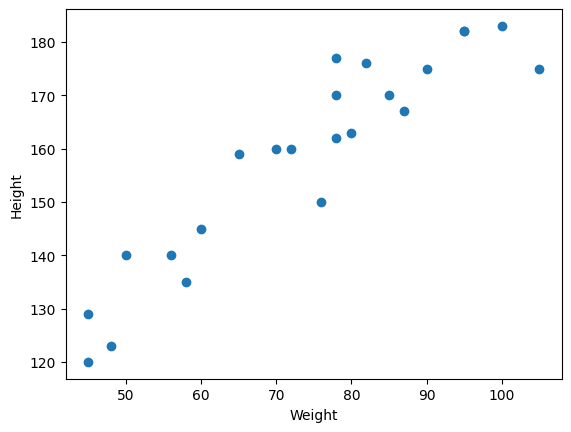

In [3]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel('Weight')
plt.ylabel("Height")

In [16]:
'''
Steps:
1) Dataset
2) Divide the features based on independent and dependent features
3) Train, Test, Split of the Dataset
4) Standardizing the Dataset
5) Train the model using Linear Regression
'''

'\nSteps:\n1) Dataset\n2) Divide the features based on independent and dependent features\n3) Train, Test, Split of the Dataset\n4) Standardizing the Dataset\n'

In [32]:
# Divide our dataset into independent and dependent features
x = df[["Weight"]]  # independent feature
y= df[["Height"]]   # dependent feature

In [33]:
x[0:5]

,Weight
0,45
1,58
2,48
3,60
4,70


In [20]:
y[0:5]

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [49]:
# Train, Test, Split of the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [35]:
x.shape

(23, 1)

In [50]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [51]:
y_train.shape,y_test.shape

((18, 1), (5, 1))

In [52]:
# Standardizing the Dataset (Train Independent Data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# You'll get your standardized trained Independent Data

In [53]:
X_test=scaler.transform(X_test) # For test you didn't need to fit data

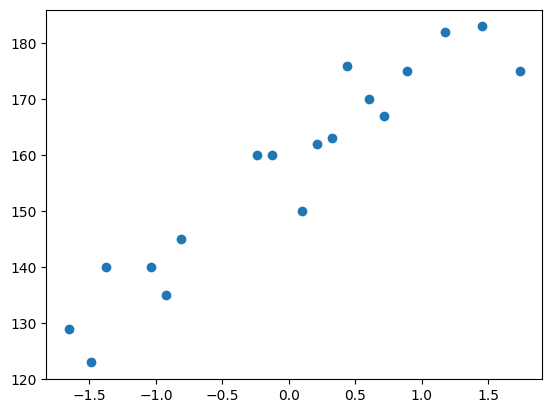

In [54]:
plt.scatter(X_train,y_train)

In [55]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [57]:
print("The slope or coefficient of weight is: ",reg.coef_)

The slope or coefficient of weight is:  [[17.03440872]]


In [58]:
print("Intercept of Weight: ",reg.intercept_)

Intercept of Weight:  [157.5]


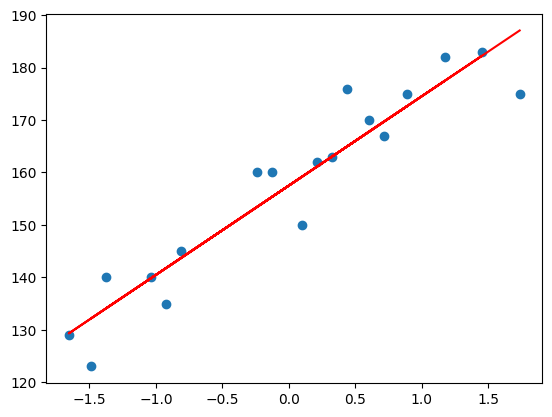

In [60]:
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train),c="r") # Best fit line

In [61]:
"""
Prediction of train data-
predicted height output= intercept +coef_(Weights)
y_pred_train =157.5 + 17.03(X_train)
"""

"""
Prediction of test data-
predicted height output= intercept +coef_(Weights)
y_pred_test =157.5 + 17.03(X_test)

"""

'\nPrediction of test data-\npredicted height output= intercept +coef_(Weights)\ny_pred_test =157.5 + 17.03(X_test)\n\n'

In [62]:
y_pred_test = reg.predict(X_test)

In [63]:
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

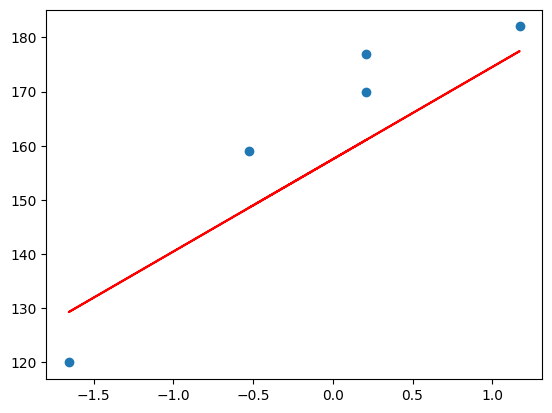

In [64]:
plt.scatter(X_test,y_test)
plt.plot(X_test,reg.predict(X_test),'r')

In [66]:
# Performance Metrics
"""
MSE,MAE,RMSE
R Square and Adjusted R square

"""

'\nMSE,MAE,RMSE\nR Square and Adjusted R square\n\n'

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test,y_pred_test)
MAE = mean_absolute_error(y_test,y_pred_test)
RMSE = np.sqrt(MSE)
# This will tell how much error is still left
print(MSE)

print(MAE)

print(RMSE) # The less the value of this is, the more the model is better

109.77592599051664
9.822657814519232
10.477400726827081


In [69]:
# Accuracy
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score


0.776986986042344

In [ ]:
# R square
# Formula

"""
R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

"""

In [ ]:
# Adjusted R Square
"""
Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables
k: no. of predictors

"""

In [70]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [71]:
reg

LinearRegression()

In [72]:
## new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [73]:
reg.predict([scaled_weight[0]])

array([[163.01076266]])

In [74]:
scaled_weight[0]

array([0.32350772])

In [76]:
print("The height prediction for weight 80 kg is :",reg.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [[163.01076266]]


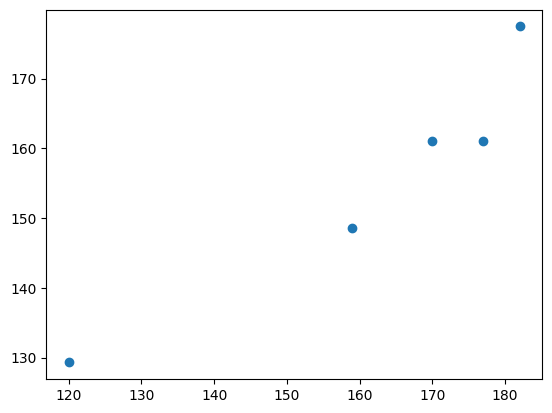

In [77]:
## Assumptions
## plot a scatter plot for the prediction
# Insights - The scatter plot is linearly distributed which means you've performed a very good prediction
plt.scatter(y_test,y_pred_test)

In [78]:
## Residuals
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<ipython-input-79-531549f08f17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: ylabel='Density'>

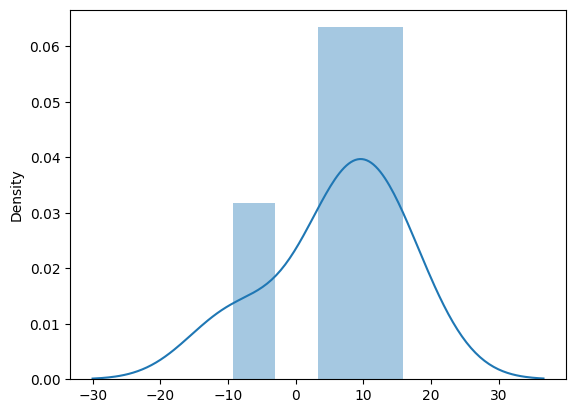

In [79]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

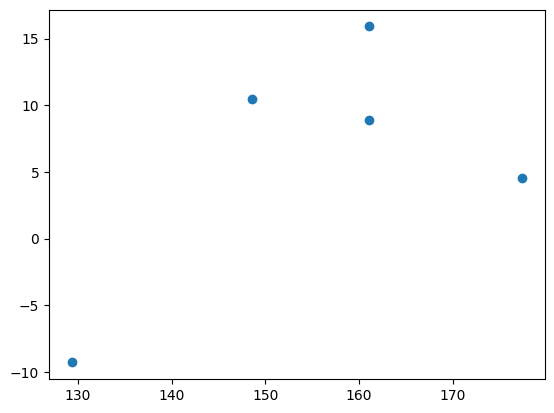

In [80]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)